# МНОГОМЕРНАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ

### Цель: построить модель для прогноза трат клиентов в год в онлайн магазине

In [1]:
# pandas — программная библиотека на языке Python для обработки и анализа данных.
# подключаем для работы с данными и их обработки 
import pandas as pd

# seaborn — это библиотека для создания статистических графиков на Python
# она основывается на matplotlib и тесно взаимодействует со структурами данных pandas
# подключаем для перевода наших данных в графическое представление
import seaborn as sns 

sns.set() # установливаем стили для графиков - seaborn

import matplotlib.pyplot as plt
import numpy as np
#это модуль Python, который предоставляет классы и функции для оценки различных статистических моделей,
#выполнения статистических тестов и изучения статистических данных
import statsmodels.api as sm

#sklearn - библиотека программного обеспечения для машинного обучения
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

import warnings # инструмент контроля предупреждений
warnings.simplefilter('ignore') # отключаем несерьезные предупреждения

%matplotlib inline

### Загружаем данные из файла

In [2]:
raw_data = pd.read_csv('EcommerceCustomers.csv')
raw_data.head(3)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


В искомом наборе данных можно сделать вывод о том что Email и Avatar не вляют на сумму трат в год, поэтому можем их удалить, Address может влиять на колличество трат в год, т.к. "дорогие" районы будут требовать больше затра, когда иные районы будут требовать меньше денег на услуги/товари/т.д., но т.к. у нас нет данных о "качествае" районов к которым относятся указанные улицы.

In [3]:
data = raw_data.drop(columns=['Email', 'Address','Avatar'],axis=1)

Проверим датасет, после удаления не нужных строк, на пропуски в оставшихся данных

In [4]:
data.isnull().sum() 

Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Т.к. пропусков нет перейдем к построению многомерной регрессии по нашим данным

## Построение многомерный регрессии 

Выделим незаисимые переменные и целевую переменную

In [5]:
targets = data['Yearly Amount Spent'] #Целевая переменная
inputs = data.drop('Yearly Amount Spent',axis = 1) # Независимые переменные

In [6]:
targets.head(3)

0    587.951054
1    392.204933
2    487.547505
Name: Yearly Amount Spent, dtype: float64

In [7]:
inputs.head(3)

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543


Берем следующее соотношение данных - тестовый набор данных = 1/3, тренировной набор данных = 2/3

In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.33, random_state = 1234)

## Создаём модель 

Инициализируем линенйную регрессию и подставляем туда тренировочные данные

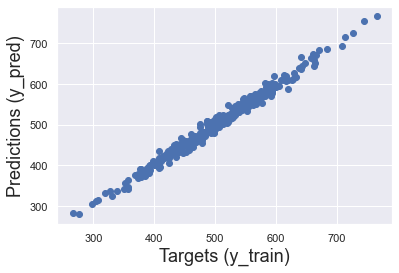

In [9]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)',size = 18)
plt.ylabel('Predictions (y_pred)',size = 18)
plt.show()

Облако точек выстроено в линию 45 градуссов и имеет минимальное рассеивание, значит у нас получился хороший прогноз 

Построим график распредления остатков

Text(0.5, 1.0, 'Residuals PDF')

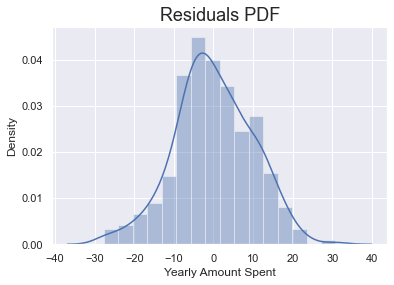

In [10]:
sns.distplot(y_train - y_pred)
plt.title("Residuals PDF", size = 18)

Выполним вычисление r^2 для тренировочоных данных. 

In [11]:
reg.score(x_train, y_train)

0.9857203289694556

## Находим значение весов

В моделе мы получаем вектор w = (w1,...,w4) как coef_ и w0 как intercept_.

Найдем w0 и w.

In [12]:
reg.intercept_

-1047.5532652233198

In [13]:
reg.coef_

array([25.60461589, 38.29501822,  0.51840421, 62.26477162])

Получим значение w для каждой независимой переменной.

Создадим сводку весов и переменных.

In [14]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Avg Session Length,25.604616
1,Time on App,38.295018
2,Time on Website,0.518404
3,Length of Membership,62.264772


Все коэффициенты является положительным, значит, данные параметры влияют положительно на целевую переменную Yearly Amount Spent.

Коэффициент при Time on Website положительный, но имеет небольшой вес, значит данный параметр не оказывает значительного влияния на целевую переменную. 

Посмотрим прогноз для тестовых данных.

Сравниваем тестовые фактические значения с тестовыми значениями прогнозов.

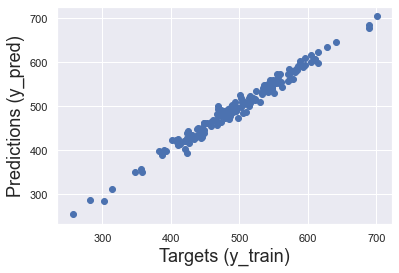

In [15]:
y_pred_test = reg.predict(x_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Targets (y_train)',size = 18)
plt.ylabel('Predictions (y_pred)',size = 18)
plt.show()

Вывод: Облако точек похоже на линию в 45 градуссов, значит прогноз хороший. Рассеивание минимально.

Посчитаем критерий эффективности r^2.

In [16]:
reg.score(x_test, y_test)

0.9804318303041285

## Метод кросс-валидации

Выполним вычисление r^2

In [17]:
scores = cross_val_score(reg, inputs, targets, cv = 10)
cv_scrore = scores.mean()
cv_scrore

0.9825492707486994

Выведем предсказанные значения

In [18]:
df_pf = pd.DataFrame(y_pred_test, columns = ['Prediction'])
df_pf.head()

,Prediction
0,478.673883
1,508.018868
2,548.921760
3,397.995781
4,443.939879


Сравним фактические результаты с спрогнозированными

In [19]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = y_test
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target'] * 100)
df_pf.head(10)

,Prediction,Target,Residual,Difference%
0,478.673883,469.310861,-9.363021,1.995057
1,508.018868,511.038786,3.019918,0.590937
2,548.921760,535.480775,-13.440985,2.510078
3,397.995781,382.416108,-15.579673,4.074011
4,443.939879,424.762636,-19.177243,4.514814
5,430.342770,445.062186,14.719416,3.307272
6,286.902202,282.471246,-4.430957,1.568640
7,534.546716,540.263400,5.716684,1.058129
8,484.722485,486.838935,2.116449,0.434733
9,427.707240,430.588883,2.881643,0.669233


Выведем на экран статистическую сводку

In [20]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,165.000000,165.000000,165.000000,165.000000
mean,499.023117,498.357258,-0.665859,1.685837
std,74.296315,73.995158,10.329337,1.367880
min,253.895153,256.670582,-30.334868,0.001409
25%,449.214440,448.229829,-7.533168,0.669233
50%,497.764649,495.299443,-0.513476,1.397431
75%,548.267797,547.190749,5.179561,2.388663
max,704.503275,700.917092,30.923112,7.289997


В среднем процент ошибки составляет 1.69 из чего множно сделать вывод построенная многомерная линейная регрессия хорошо подходит для прогнозирования Yearly Amount Spent